In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm

In [2]:
budget = 10000
contract = 300
income = 50
exposure = 0.18
contract_limit = 10
days_limit = 60

In [3]:
G = nx.read_edgelist('edge_list.txt')

In [4]:
cc = nx.connected_components(G)
cc = list(cc)

In [5]:
cc_lengths = pd.Series([len(c) for c in cc], name='cc_lengths')
cc_lengths

0     3732
1        2
2        3
3        2
4        2
5        2
6      180
7        9
8        6
9        3
10       2
11       2
12       2
13       4
14       2
Name: cc_lengths, dtype: int64

In [6]:
def draw_subgraph(c, figsize=(6, 6)):
    subG = G.subgraph(cc[c])
    pos = nx.kamada_kawai_layout(subG)

    plt.figure(figsize=figsize)
    nx.draw_networkx_nodes(subG, pos)
    nx.draw_networkx_edges(subG, pos)
    nx.draw_networkx_labels(subG, pos)
    plt.show()

In [65]:
def get_good_neighbors(node, threshold=5):
    neighbors = list(G.neighbors(str(node)))
    degrees = list(G.degree[x] for x in neighbors)
    neighbors_degrees = np.stack([list(map(int, neighbors)), degrees],axis=1)
    neighbors_good = neighbors_degrees[neighbors_degrees[:,1] <= threshold,:]
    return list(neighbors_good) if len(neighbors_good) else np.nan
    
display(G.degree['2949'])
get_good_neighbors(2949)
# display(G.degree['3066'])
# get_good_neighbors(3066)
# display(G.degree['2983'])
# get_good_neighbors(2983)

nan

In [67]:
cliques_num = 0
cliques = {}
clique_component = {}
clique_lengths = {}

#def analyze_subgraph(c):
c = 0
if True:
    subG = G.subgraph(cc[c])
        
    nodes = []
    node_clique = []
    node_clique_nodes = []
    node_clique_length = []
    node_degrees = []
    node_neighbors = []
    node_neighbors_count = []
    node_neighbors_degrees = []
    node_neighbors_good = []
    
#    cliques = nx.algorithms.community.k_clique_communities(subG, 4)

    cliques = []
    with open('4_0_clique.txt', 'r') as f:
        cliques = list(map(eval, f.readlines()))
        
    for clique in cliques:
        cliques[cliques_num] = clique
        clique_component[cliques_num] = c
        clique_lengths[cliques_num] = len(clique)
        
        for node in clique: #tqdm(clique):
            v = int(node)
            nodes.append(node)
            node_degrees.append(G.degree[node])
            node_clique.append(cliques_num)
            
            node_clique_nodes.append(list(clique))
            node_neighbors.append(list(G.neighbors(node)))
            node_neighbors_degrees.append(list((x, G.degree[x]) for x in node_neighbors[-1]))
            node_neighbors_good.append(get_good_neighbors(node))
            
        cliques_num += 1

    df = pd.concat([
        pd.Series(nodes, name='node'),
        pd.Series(node_degrees, name='degree'),
        pd.Series(node_clique, name='clique')
    ], axis=1)

    df['clique_nodes'] = pd.Series(node_clique_nodes)
    df['clique_length'] = df['clique_nodes'].apply(len)
    df['neighbors'] = pd.Series(node_neighbors)
    df['neighbors_degrees'] = pd.Series(node_neighbors_degrees)
    df['neighbors_good'] = pd.Series(node_neighbors_good).replace(list(), np.nan)
    
    # return df
    
df.dropna().sort_values(by='degree')

,node,degree,clique,clique_nodes,clique_length,neighbors,neighbors_degrees,neighbors_good
189,2094,6,19,"[2245, 2094, 2535, 2487, 2301, 2281, 1961, 1956]",8,"[2535, 2487, 2245, 2281, 2167, 2301]","[(2535, 10), (2487, 8), (2245, 6), (2281, 8), ...","[[2167, 4]]"
409,167,6,44,"[243, 93, 111, 310, 137, 167, 337]",7,"[137, 310, 32, 243, 93, 337]","[(137, 15), (310, 12), (32, 5), (243, 7), (93,...","[[32, 5]]"
571,2094,6,60,"[2245, 2094, 2535, 2487, 2301, 2281, 1961, 1956]",8,"[2535, 2487, 2245, 2281, 2167, 2301]","[(2535, 10), (2487, 8), (2245, 6), (2281, 8), ...","[[2167, 4]]"
176,296,6,17,"[227, 175, 177, 263, 99, 278, 68, 131, 225, 29...",11,"[175, 263, 99, 102, 227, 68]","[(175, 16), (263, 6), (99, 12), (102, 5), (227...","[[102, 5]]"
552,263,6,58,"[227, 175, 177, 263, 99, 278, 68, 131, 225, 29...",11,"[175, 99, 68, 102, 227, 296]","[(175, 16), (99, 12), (68, 8), (102, 5), (227,...","[[102, 5]]"
...,...,...,...,...,...,...,...,...
437,3538,19,47,"[3541, 3868, 3657, 3917, 3567, 3857, 3874, 344...",18,"[3743, 3628, 3917, 3868, 3567, 3739, 3657, 389...","[(3743, 18), (3628, 22), (3917, 14), (3868, 17...","[[3441, 5]]"
468,2949,19,50,"[2933, 3012, 2949, 3066, 2997, 2935, 3028, 336...",11,"[2886, 2999, 2997, 2933, 2693, 3083, 2983, 306...","[(2886, 9), (2999, 29), (2997, 13), (2933, 13)...","[[3310, 4]]"
492,2934,19,52,"[2962, 3244, 3246, 2820, 2696, 2934, 2697]",7,"[2697, 3385, 3244, 2724, 3077, 2892, 3295, 300...","[(2697, 15), (3385, 52), (3244, 13), (2724, 69...","[[3370, 5]]"
667,171,19,71,"[189, 217, 171, 64, 100, 150]",6,"[119, 64, 217, 150, 189, 58, 1297, 1486, 904, ...","[(119, 61), (64, 6), (217, 7), (150, 10), (189...","[[1297, 5], [1486, 4], [904, 2], [3003, 3], [2..."


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
degree,764.0,11.965969,3.875033,6.0,8.0,12.0,15.0,19.0
clique,764.0,40.424084,23.718881,0.0,19.0,40.5,60.0,81.0
clique_length,764.0,10.853403,4.038410,5.0,7.0,10.0,14.0,18.0
neighbors_count,764.0,11.965969,3.875033,6.0,8.0,12.0,15.0,19.0


In [ ]:
df = analyze_subgraph(0)


df #[df.clique == 0].sort_values(by='nodeCost')

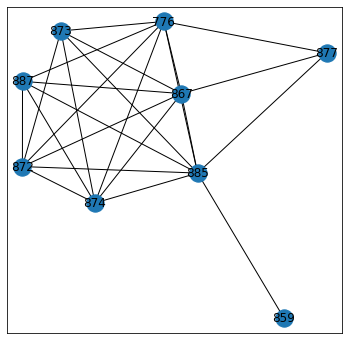

array(<generator object analyze_subgraph.<locals>.<genexpr> at 0x7f0357f22190>,
      dtype=object)

In [103]:
analyze_subgraph(G, cc[7], draw=True)

In [49]:
G6 = analyze_subgraph(G, cc[6])
G6

749     1
699     1
775     1
750     1
744     1
       ..
719    62
805    64
705    68
713    69
828    77
Length: 180, dtype: int64

[array(['702', '714', '732', '806', '725', '789', '818', '802', '839',
        '822', '771', '796', '689', '791', '712'], dtype='<U3'),
 array(['753', '876', '888', '861', '804', '886', '856', '882', '729',
        '878', '889', '863'], dtype='<U3'),
 array(['830', '770', '810', '856', '811', '756', '817', '706', '696',
        '701', '844', '807', '787', '700', '813', '723', '824', '727',
        '777', '821', '843', '716', '760', '766', '726', '797', '842',
        '780', '719', '795', '755', '693', '734', '835', '812', '820',
        '836', '694', '728', '695', '837', '751', '759', '690', '778',
        '762', '809', '819', '815', '765', '722', '838', '840', '697',
        '753', '737', '793', '845', '800', '880', '724', '799', '764',
        '829', '741', '826', '784', '783', '747', '763', '708', '792',
        '739', '805', '828', '758', '745', '847', '752', '703', '730',
        '779', '853', '781', '688', '834', '803', '890', '769', '827',
        '731', '718', '710', '869', '75

In [51]:
G6c0 = analyze_subgraph(G, G6[0])#, draw=True)
display(G6c0)
G6c0[796]

796     4
802     4
712     5
791     6
702     7
725     7
689     7
822     9
789     9
771    10
839    11
714    11
806    11
818    11
732    12
dtype: int64

[array(['702', '714', '732', '806', '725', '789', '818', '802', '839',
        '822', '771', '796', '689', '791', '712'], dtype='<U3')]

IndexError: list index out of range

In [108]:
G6 = G.subgraph(cc[6])

Подграф G0

In [109]:
nodes = np.array(G0.nodes)
nodes

array(['236', '186', '84', ..., '3992', '4036', '4028'], dtype='<U4')

In [112]:
degrees = pd.Series({k: v for k, v in G0.degree}, index=nodes)
degrees.sort_values(ascending=False)
degrees = degrees[(degrees > 5) & (degrees < 100)]
degrees.sort_values()

3988     6
3372     6
2902     6
3216     6
338      6
        ..
2719    99
1643    99
1163    99
2203    99
1334    99
Length: 2841, dtype: int64

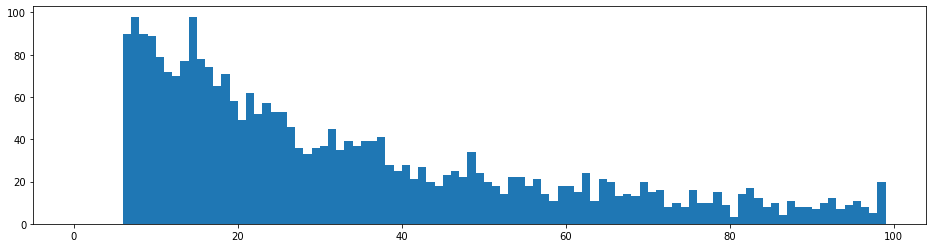

In [120]:
plt.figure(figsize=(16,4))
plt.hist(degrees, bins=range(100), width=1)
plt.show()

In [63]:
G0sel = G.subgraph(degrees.index)
nodes = np.array(G0sel.nodes)
degrees = pd.Series({k: v for k, v in G0sel.degree}, index=nodes)
degrees

3539    2
3083    4
2886    5
3669    5
129     1
       ..
3094    0
3666    0
3251    7
2439    3
3372    6
Length: 367, dtype: int64

In [64]:
budget = 10000
contract = 300
exposure = 0.18

In [ ]:
def save_cliques(c, k):
    subG = G.subgraph(cc[c])
    k_clique = nx.algorithms.community.k_clique_communities(subG, k)
    for clique in k_clique:
        with open(f'{k}_{c}_clique.txt','a') as f:
            f.write(str(list(clique)) + '\n')
        
save_cliques(0, 4)

In [66]:
clique = []
for kcl in k_clique:
    kcl = list(kcl)
    clique.append(kcl)
#     with open('k_clique.txt','a') as f:
#         f.write(str(list(kcl)) + '\n')

In [67]:
df = pd.Series(clique) \
    .to_frame(name='node')

df['clique'] = df['node']
df['len'] =  df['clique'].apply(len)

df = df.explode('node') \
    .reset_index(drop=True)

df['degree'] = df['node'].apply(lambda x: degrees[x])
df['cost'] = df['degree'] * 300
df

,node,clique,len,degree,cost
0,3053,"[3053, 2799, 3122, 3218, 3354]",5,5,1500
1,2799,"[3053, 2799, 3122, 3218, 3354]",5,4,1200
2,3122,"[3053, 2799, 3122, 3218, 3354]",5,4,1200
3,3218,"[3053, 2799, 3122, 3218, 3354]",5,4,1200
4,3354,"[3053, 2799, 3122, 3218, 3354]",5,4,1200
5,3700,"[3700, 3669, 3502, 3911, 3813, 3864]",6,5,1500
6,3669,"[3700, 3669, 3502, 3911, 3813, 3864]",6,5,1500
7,3502,"[3700, 3669, 3502, 3911, 3813, 3864]",6,5,1500
8,3911,"[3700, 3669, 3502, 3911, 3813, 3864]",6,5,1500
9,3813,"[3700, 3669, 3502, 3911, 3813, 3864]",6,5,1500
